In [55]:
import pickle
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.linear_model import Ridge
from numpy import nan
from sklearn import linear_model

# Generating a feature family where x ~ N(0,1), ε ~ N(0,1/25), and y = xβ + ε

In [91]:
x = np.zeros((50,1000))
x_test = np.zeros((500,1000))

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        x[i,j] = np.random.normal(0,10,1)
#         x[i,j] = np.random.poisson(lam = 4,size = 1)
#         x[i,j] = np.random.rayleigh(scale = 3,size = 1)
#         x[i,j] = i + j

for i in range(x_test.shape[0]):
    for j in range(x_test.shape[1]):
        x_test[i,j] = np.random.normal(0,10,1)
#         x_test[i,j] = np.random.poisson(lam = 4,size = 1)
#         x_test[i,j] = np.random.rayleigh(scale = 3,size = 1)
#         x_test[i,j] = i + j

noise = np.random.normal(0, 1/25, x.shape[0])

noise_test = np.random.normal(0, 1/25, x_test.shape[0])

# beta_supp = np.ones(int(x.shape[1]/100))

# beta_not_supp = np.zeros(int(x.shape[1]*99/100))

# beta = np.append(beta_supp,beta_not_supp,axis = 0)

beta = np.linspace(1,x.shape[1],x.shape[1])
beta = beta[::-1]
beta[0] = 100000000

beta = abs(beta)

beta = (beta/np.sqrt(np.sum(beta**2)))

beta = np.transpose(beta)

y = np.matmul(x,beta) + noise

y = y.reshape((y.size,1))

y_test = np.matmul(x_test,beta) + noise_test


y_test = y_test.reshape((y_test.size,1))


## Getting the actual accuracy using the random selection of features and fitting a linear regression model using those features

### This is using randomly chosen features

In [92]:
test_accuracy  = np.zeros(x.shape[1])

coeff_list_max = list()
coeff_list_min = list()

unif_lists = list()

for j in range(1,x.shape[1] + 1):
    
    # selecting the random features
    if(j < x.shape[1]):
        unif_list = np.random.choice(x.shape[1] -1,size = j,replace = False)
        unif_list.sort()
    else:
        unif_list = np.linspace(1,x.shape[1],x.shape[1])
        unif_list -=1
        unif_list = unif_list.astype(int)
        
#     print(unif_list)
    
    temp_x = x[:,unif_list]
    
    unif_lists.append(set(unif_list))

    # fitting the model with the randomly selected features
    lm = LinearRegression().fit(temp_x,y)
    
    # getting the coefficient of the lm model
    beta_temp = lm.coef_
    beta_temp = beta_temp.reshape(beta_temp.size,1)
    beta_temp = beta_temp.astype(float)
    
    (lm.coef_).sort()
    
    
    coeff_list_max.append(lm.coef_[0,-1])
    coeff_list_min.append(lm.coef_[0,0])
    
    beta = np.zeros((x.shape[1],1))
    counter = 0
    for i in range(x.shape[1]):
        if(i in unif_list):
            beta[i] = beta_temp[counter]
            counter+= 1
        else:
            beta[i] = 0
    
#     print("This is the counter " + str(counter))
    pred = np.matmul(x_test,beta)
    pred = pred.reshape(pred.size,1)
    
    test_accuracy[j-1] = mean_squared_error(pred,y_test)
    
#     print("This is the test accuracy using " + str(j) + " uniformly distributed "  + str(test_accuracy[j-1]))

    


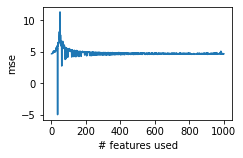

In [93]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(3.48,2.3))
plt.ylabel("mse")
plt.xlabel("# features used")
sns.lineplot(x = np.linspace(1,x.shape[1],x.shape[1]), y = (np.log(test_accuracy)))
plt.tight_layout()
plt.savefig('no_double_descent_experimental_randomly_chosen.pdf', dpi=100, bbox_inches='tight')

### This is using a prescient model

In [94]:
test_accuracy  = np.zeros(x.shape[1])

coeff_list_max = list()
coeff_list_min = list()

unif_lists = list()

for j in range(1,x.shape[1] + 1):
    
    # selecting the random features
    unif_list = np.linspace(1,j,j)
    unif_list -=1
    unif_list = unif_list.astype(int)
    
    temp_x = x[:,unif_list]
    
    unif_lists.append(set(unif_list))

    # fitting the model with the randomly selected features
    lm = LinearRegression().fit(temp_x,y)
    
    # getting the coefficient of the lm model
    beta_temp = lm.coef_
    beta_temp = beta_temp.reshape(beta_temp.size,1)
    beta_temp = beta_temp.astype(float)
    
    (lm.coef_).sort()
    
    
    coeff_list_max.append(lm.coef_[0,-1])
    coeff_list_min.append(lm.coef_[0,0])
    
    beta = np.zeros((x.shape[1],1))
    counter = 0
    for i in range(x.shape[1]):
        if(i in unif_list):
            beta[i] = beta_temp[counter]
            counter+= 1
        else:
            beta[i] = 0
    
#     print("This is the counter " + str(counter))
    pred = np.matmul(x_test,beta)
    pred = pred.reshape(pred.size,1)
    
    test_accuracy[j-1] = mean_squared_error(pred,y_test)
    
#     print("This is the test accuracy using " + str(j) + " uniformly distributed "  + str(test_accuracy[j-1]))

    

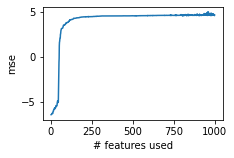

In [95]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(3.48,2.3))
plt.ylabel("mse")
plt.xlabel("# features used")
sns.lineplot(x = np.linspace(1,x.shape[1],x.shape[1]), y = (np.log(test_accuracy)))
plt.tight_layout()
plt.savefig('no_double_descent_experimental_randomly_chosen.pdf', dpi=100, bbox_inches='tight')

### Ridge and Lasso Solution no matter the number of parameters used

In [96]:
lm = Ridge().fit(x,y)
pred = lm.predict(x_test)
print(lm.coef_)
test_accuracy_ridge = mean_squared_error(pred,y_test)
print(np.log(mean_squared_error(pred,y_test)))

[[ 4.54836564e-02 -1.05769560e-02 -1.00247599e-03 -7.15501006e-03
  -7.64483018e-03  9.47245751e-03  1.77016083e-03  5.92951472e-03
   1.28470248e-03 -1.77932666e-03  4.08802511e-03 -1.19848726e-03
  -5.83984633e-03  1.07734122e-02 -2.37373082e-03 -8.18617816e-03
  -7.86838992e-03  2.60027361e-03 -2.21219081e-03  4.50747661e-03
  -6.78191175e-03  6.60081622e-03  6.13859498e-05 -1.66205012e-03
   5.76357936e-03  3.90246539e-03  1.55678627e-02 -1.02506530e-03
   7.78303170e-03 -7.11229220e-03 -9.02919390e-03 -1.04610398e-02
  -7.09990577e-03  3.44435015e-03  6.51319211e-03  1.06045217e-02
   1.05934819e-02  2.66101006e-03 -3.52211733e-03 -9.30673539e-03
  -4.61970860e-03 -5.12246918e-03  4.25267534e-03  3.03928651e-04
  -8.24945449e-04  4.25877014e-03 -1.08578914e-02  5.77148940e-03
  -7.28332090e-03  4.99534727e-03  1.23680240e-03 -3.75952819e-03
   9.12350377e-03 -7.61805083e-03 -5.43717446e-03  1.08654451e-03
  -5.78310566e-03  4.28547197e-03 -4.75181313e-03 -9.89260857e-03
   6.32186

In [97]:
lm = linear_model.Lasso().fit(x,y)

print(lm.coef_)
pred = lm.predict(x_test)
test_accuracy_ridge = mean_squared_error(pred,y_test)
print(np.log(mean_squared_error(pred,y_test)))

[ 0.98879265 -0.         -0.         -0.         -0.          0.
  0.          0.          0.         -0.          0.         -0.
 -0.          0.         -0.         -0.         -0.          0.
 -0.          0.         -0.          0.          0.         -0.
 -0.          0.          0.         -0.          0.         -0.
 -0.         -0.         -0.          0.          0.          0.
  0.          0.         -0.         -0.         -0.         -0.
  0.          0.         -0.          0.         -0.          0.
 -0.          0.          0.         -0.          0.         -0.
 -0.          0.         -0.          0.         -0.         -0.
 -0.          0.          0.         -0.         -0.         -0.
 -0.          0.         -0.          0.          0.         -0.
  0.          0.         -0.          0.         -0.         -0.
 -0.          0.          0.          0.         -0.          0.
  0.         -0.          0.         -0.         -0.         -0.
  0.         -0.         

## Plotting how the highest coefficient in the min norm solution evolves

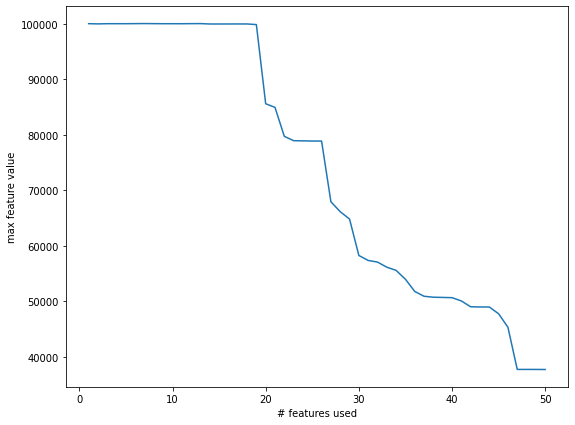

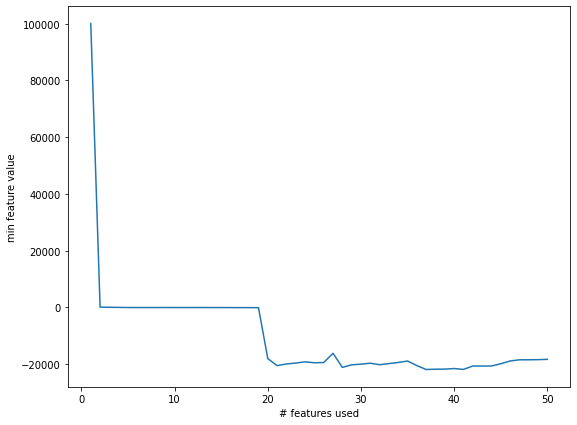

In [37]:
# print(coeff_list)
plt.figure(figsize = (9,7))
sns.lineplot(x = np.linspace(1,x.shape[1],x.shape[1]), y = coeff_list_max)
plt.xlabel("# features used")
plt.ylabel("max feature value")
plt.show()
    
    
plt.figure(figsize = (9,7))
sns.lineplot(x = np.linspace(1,x.shape[1],x.shape[1]), y = coeff_list_min)
plt.xlabel("# features used")
plt.ylabel("min feature value")
plt.show()

## Graphing the Risk Curve for HSU which is the theorem 1 curve under the selection of uniformly random features that are selected

In [49]:
risk_curve = list()

list_of_indices = np.linspace(1,x.shape[1],x.shape[1])
list_of_indices -=1
list_of_indices = list_of_indices.astype(int)
set_of_indices = set(list_of_indices)

for i in range(x.shape[1]):
    opp_list = list(set_of_indices - set(unif_lists[i]))
    
    beta_tc_norm = np.sum((beta[opp_list]**2))
    beta_t_norm = np.sum(beta[list(unif_lists[i])]**2)
    
    if(i <= x.shape[0] - 2):
        risk_curve.append((beta_tc_norm + 1/25)*(1 + (i/(x.shape[0] -i -1))))

    elif( i <=  x.shape[0]+1 and i >=  x.shape[0]-1):
        risk_curve.append(np.Inf)
        
    else:
        first_el = (beta_t_norm)*(1 - (x.shape[0]/i))
        second_el = (beta_tc_norm + 1/25)*(1 + (x.shape[0]/(i - x.shape[0] -1)))
        risk_curve.append(first_el + second_el)
        
    
print(risk_curve)

[2350996012.902031, 2278701297.96197, 2343376568.6384835, 2408476289.188602, 2563767430.235698, 2730154015.546383, 2940085266.446466, 3184400706.2668743, 3332016381.485626, 3661069761.9002695, 4026232349.0992036, 4190521964.2758317, 4252855753.991398, 4731502821.512611, 5508355300.161211, 6884152169.500257, 8956551082.145893, 12578951375.380222, 24281784008.694996, inf, inf, inf, 26254653142.217255, 13058449637.210743, 9167070508.448252, 7239314919.5381365, 5440741909.341977, 4858969809.702016, 4479926562.198256, 3539205522.7074356, 3272726942.2740717, 3169069629.8272624, 2953187777.4090643, 2836611647.232637, 2743904098.3786983, 2733932848.3463073, 2694177755.06235, 2680274007.673253, 2664754322.9467673, 2675061139.296258, 2672447618.8620915, 2659294475.117388, 2667824119.4444213, 2664329842.180122, 2640822574.537536, 2525286796.5691032, 2134309220.423173, 2169190513.269477, 2202400379.193736, 2233794687.6355443]


   features  test_curve  theoretical_curve
0       1.0   10.717818          21.578105
1       2.0   10.663104          21.546872
2       3.0   10.723269          21.574859
3       4.0   10.681898          21.602260
4       5.0   10.714145          21.664744


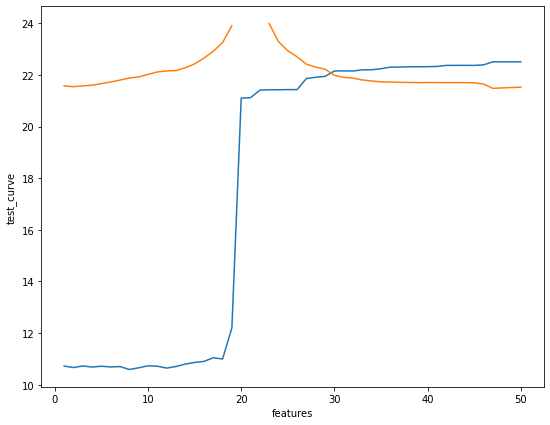

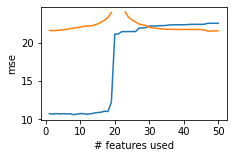

In [50]:
df = pd.DataFrame(data = np.transpose(np.array([np.linspace(1,x.shape[1],x.shape[1]), np.log(test_accuracy),np.log(risk_curve)])),
                 columns = ["features","test_curve","theoretical_curve"])

print(df.head())
plt.figure(figsize = (9,7))
sns.lineplot(data = df, x= "features", y = "test_curve")
sns.lineplot(data = df, x= "features", y = "theoretical_curve")
plt.show()

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(3.48,2.3))
plt.ylabel("mse")
plt.xlabel("# features used")
sns.lineplot(data = df, x= "features", y = "test_curve")
sns.lineplot(data = df, x= "features", y = "theoretical_curve")
plt.tight_layout()
plt.savefig('no_double_descent_experimental_randomly_chosen.pdf', dpi=100, bbox_inches='tight')